In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data from all models

In [2]:
model_list = [
    # Main set of models with instruct divide and size variety
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # Small reference model - would allow for pretraining variation
    "gpt2-medium",
    # Other open models
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b",
    "google/gemma-7b-it"
]

def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42_07_18/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Judgment"] = "Covered"
    model_results.loc[model_results["Covered"] == True, "Judgment_prob"] = model_results["Covered_prob"]
    model_results.loc[model_results["NotCovered"] == True, "Judgment"] = "NotCovered"
    model_results.loc[model_results["NotCovered"] == True, "Judgment_prob"] = model_results["NotCovered_prob"]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in model_list]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + combined_df["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         255
B         164
A         112
Yes        85
it         48
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    820
B      259
No      92
no      48
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    789
B      184
no     177
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B output
yes        556
no      

(14904, 28)

In [3]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
4330,604,Identity Theft I,agreement_negation,Jason has insurance coverage against loss and ...,unambiguous_covered,yes,yes.\nThe key to this question is to understa...,NaN,-3.6203,0.654169,...,0.654169,0.16165,0.654169,False,True,0.883804,Llama-3.2-3B-Instruct,NotCovered,0.654169,Identity Theft Iunambiguous_covered


In [4]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,it,it depends.\nThe insurance company's definiti...,NaN,-5.554084,0.095245,...,0.068116,0.095245,0.068116,True,False,0.556171,Llama-3.2-1B,Covered,0.095245,Emergency Damages Iunambiguous_uncovered
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,it,it depends.\nThe insurance company argues tha...,NaN,-5.560510,0.096750,...,0.067207,0.096750,0.067207,True,False,0.557145,Llama-3.2-1B,Covered,0.096750,Emergency Damages Iunambiguous_covered
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,it,it depends.\nThe insurance company's definiti...,NaN,-5.304534,0.112464,...,0.070489,0.112464,0.070489,True,False,0.597797,Llama-3.2-1B,Covered,0.112464,Emergency Damages Icontroversial
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,it,it depends.\nThe first thing to note is that ...,NaN,-4.786050,0.141056,...,0.083616,0.141056,0.083616,True,False,0.681065,Llama-3.2-1B,Covered,0.141056,Emergency Damages IIunambiguous_uncovered
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,it,it depends.\nThe first thing to note is that ...,NaN,-4.936429,0.120958,...,0.086790,0.120958,0.086790,True,False,0.652136,Llama-3.2-1B,Covered,0.120958,Emergency Damages IIunambiguous_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14899,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.750042,0.000159,...,0.049785,0.367862,0.049785,True,False,0.713895,gemma-7b-it,Covered,0.367862,Vehicle Glass Iunambiguous_covered
14900,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.541211,0.000153,...,0.037209,0.101144,0.037209,True,False,0.440780,gemma-7b-it,Covered,0.101144,Vehicle Glass Icontroversial
14901,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.605734,0.000236,...,0.034860,0.257580,0.034860,True,False,0.617459,gemma-7b-it,Covered,0.257580,Vehicle Glass IIunambiguous_uncovered
14902,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.389812,0.000179,...,0.043501,0.412730,0.043501,True,False,0.720363,gemma-7b-it,Covered,0.412730,Vehicle Glass IIunambiguous_covered


In [5]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
yes_or_no_df = combined_df[prompt_type_mask]

np_range = lambda x: np.round(np.max(x) - np.min(x), 2)
yes_or_no_judgement_range = yes_or_no_df[['model_name', 'Covered_prob', 'NotCovered_prob']].melt(id_vars='model_name', value_vars=['Covered_prob', 'NotCovered_prob']).groupby('model_name', as_index=False).agg(
    Min = pd.NamedAgg('value', lambda x: np.round(np.min(x), 2)),
    Max = pd.NamedAgg('value', lambda x: np.round(np.max(x), 2)),
    # Range= pd.NamedAgg('value', np_range),
).rename({"model_name": "Model"}, axis=1)
yes_or_no_judgement_range

,Model,Min,Max
0,Llama-3.1-8B,0.12,0.34
1,Llama-3.1-8B-Instruct,0.09,0.70
2,Llama-3.2-1B,0.06,0.27
3,Llama-3.2-1B-Instruct,0.13,0.50
4,Llama-3.2-3B,0.08,0.50
5,Llama-3.2-3B-Instruct,0.15,0.65
6,Ministral-8B-Instruct-2410,0.20,0.58
7,OLMo-2-1124-7B,0.18,0.56
8,OLMo-2-1124-7B-Instruct,0.00,0.99
9,gemma-7b,0.17,0.43


In [6]:
count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels = count_labels.rename({'model_name' : 'Model'}, axis=1)
count_labels

,Model,Covered,NotCovered
0,Llama-3.2-1B,138,0
1,Llama-3.2-1B-Instruct,138,0
2,Llama-3.2-3B,129,9
3,Llama-3.2-3B-Instruct,51,87
4,Llama-3.1-8B,75,63
5,Llama-3.1-8B-Instruct,0,138
6,gpt2-medium,5,133
7,OLMo-2-1124-7B,73,65
8,OLMo-2-1124-7B-Instruct,53,85
9,Ministral-8B-Instruct-2410,87,51


In [8]:
# Merge the two tables
yes_or_no_table = pd.concat([count_labels.set_index('Model'), yes_or_no_judgement_range.set_index('Model')], axis=1, join='inner')
yes_or_no_table

,Covered,NotCovered,Min,Max
Model,,,,
Llama-3.2-1B,138,0,0.06,0.27
Llama-3.2-1B-Instruct,138,0,0.13,0.50
Llama-3.2-3B,129,9,0.08,0.50
Llama-3.2-3B-Instruct,51,87,0.15,0.65
Llama-3.1-8B,75,63,0.12,0.34
Llama-3.1-8B-Instruct,0,138,0.09,0.70
gpt2-medium,5,133,0.12,0.30
OLMo-2-1124-7B,73,65,0.18,0.56
OLMo-2-1124-7B-Instruct,53,85,0.00,0.99


In [9]:
yes_or_no_table.to_latex("reports/yes_or_no_table.tex", index=True, float_format="%.2f")

In [31]:
count_labels.melt(id_vars=['model_name'], value_vars=["Covered", "NotCovered"])

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['model_name']"

<Axes: xlabel='model_name', ylabel='value'>

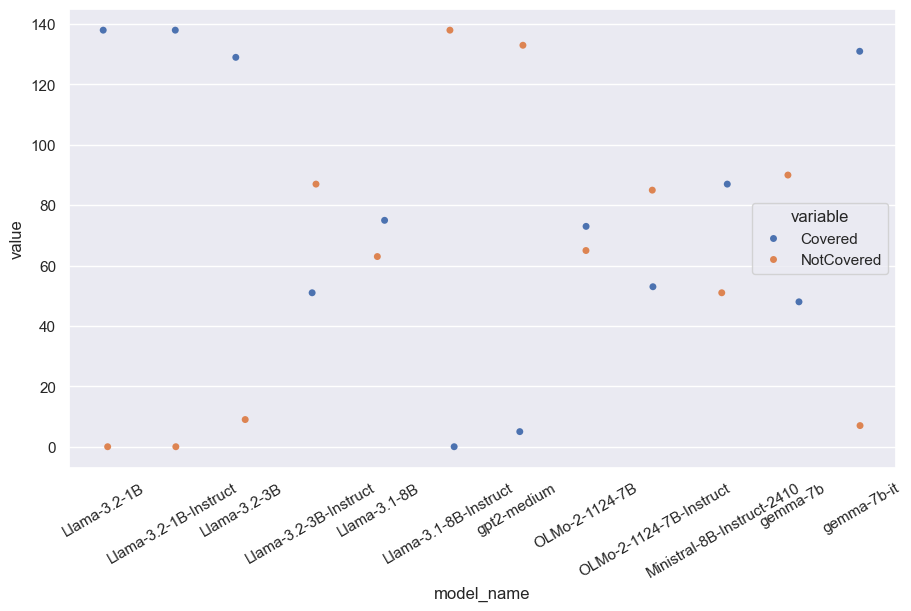

In [195]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid", rc={'axes.grid': True})
sns.stripplot(data=count_labels.melt(id_vars=['model_name'], value_vars=["Covered", "NotCovered"]), x='model_name', hue='variable', y='value' )

In [104]:
combined_df[['model_name', 'prompt_type', 'Covered_prob', 'NotCovered_prob']].melt(id_vars = ['model_name', 'prompt_type'], value_vars=['Covered_prob', 'NotCovered_prob']).groupby(['model_name', 'prompt_type'], as_index=False, sort=False).agg(
 {'value': [np_range]}   
).pivot(index='model_name', columns=['prompt_type'])

value                                  \
                            <lambda>                                   
prompt_type                agreement agreement_negation disagreement   
model_name                                                             
Llama-3.1-8B                    0.21               0.20         0.19   
Llama-3.1-8B-Instruct           0.44               0.37         0.27   
Llama-3.2-1B                    0.42               0.46         0.38   
Llama-3.2-1B-Instruct           0.46               0.37         0.39   
Llama-3.2-3B                    0.35               0.32         0.24   
Llama-3.2-3B-Instruct           0.38               0.54         0.45   
Ministral-8B-Instruct-2410      0.29               0.17         0.13   
OLMo-2-1124-7B                  0.39               0.44         0.35   
OLMo-2-1124-7B-Instruct         1.00               1.00         1.00   
gemma-7b                        0.20               0.19         0.22   
gemma-7b-it                     0.99               0.97         0.87   
gpt2-medium                     0.34               0.22         0.26   

                                                                             \
                                                                              
prompt_type                disagreement_negation negation no_or_yes options   
model_name                                                                    
Llama-3.1-8B                                0.17     0.22      0.18    0.24   
Llama-3.1-8B-Instruct                       0.29     0.48      0.67    0.55   
Llama-3.2-1B                                0.46     0.20      0.15    0.26   
Llama-3.2-1B-Instruct                       0.32     0.31      0.47    0.43   
Llama-3.2-3B                                0.25     0.42      0.36    0.29   
Llama-3.2-3B-Instruct                       0.60     0.27      0.40    0.73   
Ministral-8B-Instruct-2410                  0.23     0.22      0.42    0.67   
OLMo-2-1124-7B                              0.45     0.28      0.36    0.46   
OLMo-2-1124-7B-Instruct                     0.98     0.93      0.96    0.99   
gemma-7b                                    0.22     0.22      0.24    0.25   
gemma-7b-it                                 0.58     0.84      0.97    0.33   
gpt2-medium                                 0.36     0.13      0.20    0.23   

                                                      
                                                      
prompt_type                options_flipped yes_or_no  
model_name                                            
Llama-3.1-8B                          0.47      0.22  
Llama-3.1-8B-Instruct                 0.55      0.61  
Llama-3.2-1B                          0.26      0.22  
Llama-3.2-1B-Instruct                 0.91      0.37  
Llama-3.2-3B                          0.39      0.41  
Llama-3.2-3B-Instruct                 0.86      0.51  
Ministral-8B-Instruct-2410            0.56      0.38  
OLMo-2-1124-7B                        0.71      0.39  
OLMo-2-1124-7B-Instruct               1.00      0.99  
gemma-7b                              0.24      0.26  
gemma-7b-it                           0.58      0.99  
gpt2-medium                           0.22      0.18

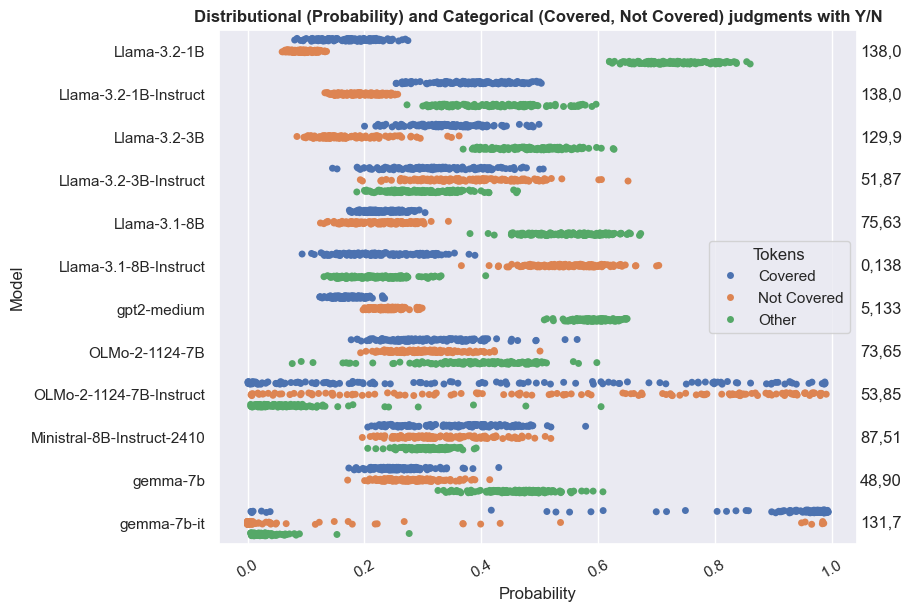

In [264]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9, 6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid", rc={'axes.grid': True})
count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)

melted_data = yes_or_no_df[["model_name", "Covered_prob", "NotCovered_prob", "Other_prob"]].rename(
     {
         "Covered_prob": "Covered",
         "NotCovered_prob": "Not Covered",
         "Other_prob": "Other",
     }
, axis=1).melt(id_vars = ["model_name"], value_vars=["Covered", "Not Covered", "Other"]).rename(
    {"value": "Probability", "model_name": "Model", "variable": "Tokens"}, axis=1)

p = sns.stripplot(x='Probability', y='Model',  hue='Tokens', dodge=True, jitter=True, legend="brief",
                  data=melted_data)
# sns.move_legend(p, "center right", bbox_to_anchor=(1, 1))
p.set_title("Distributional (Probability) and Categorical (Covered, Not Covered) judgments with Y/N",
           fontdict={'weight':'bold'})
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.04, i, f'{covered},{not_covered}', 
        ha='center', va='center')

fig.savefig("reports/chart-1-prob-ranges.pdf")

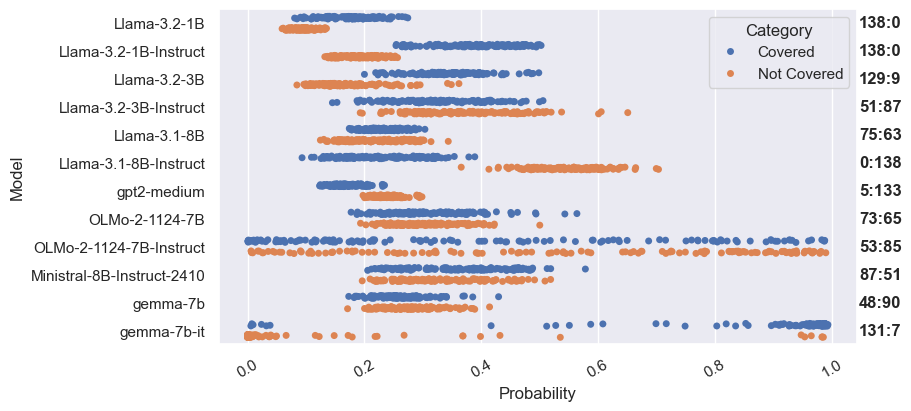

In [240]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,4), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid", rc={'axes.grid': True})
count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)

melted_data = yes_or_no_df[["model_name", "Covered_prob", "NotCovered_prob"]].rename(
     {
         "Covered_prob": "Covered",
         "NotCovered_prob": "Not Covered",
         #"Other_prob": "Other",
     }
, axis=1).melt(id_vars = ["model_name"], value_vars=["Covered", "Not Covered"]).rename(
    {"value": "Probability", "model_name": "Model", "variable": "Category"}, axis=1)

p = sns.stripplot(x='Probability', y='Model',  hue='Category', dodge=True, legend="brief",
                  data=melted_data)
# sns.move_legend(p, "center right", bbox_to_anchor=(1, 1))

for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.04, i, f'{covered}:{not_covered}', 
        ha='center', va='center', fontweight='bold')
fig.savefig("reports/chart-1-prob-ranges.pdf")

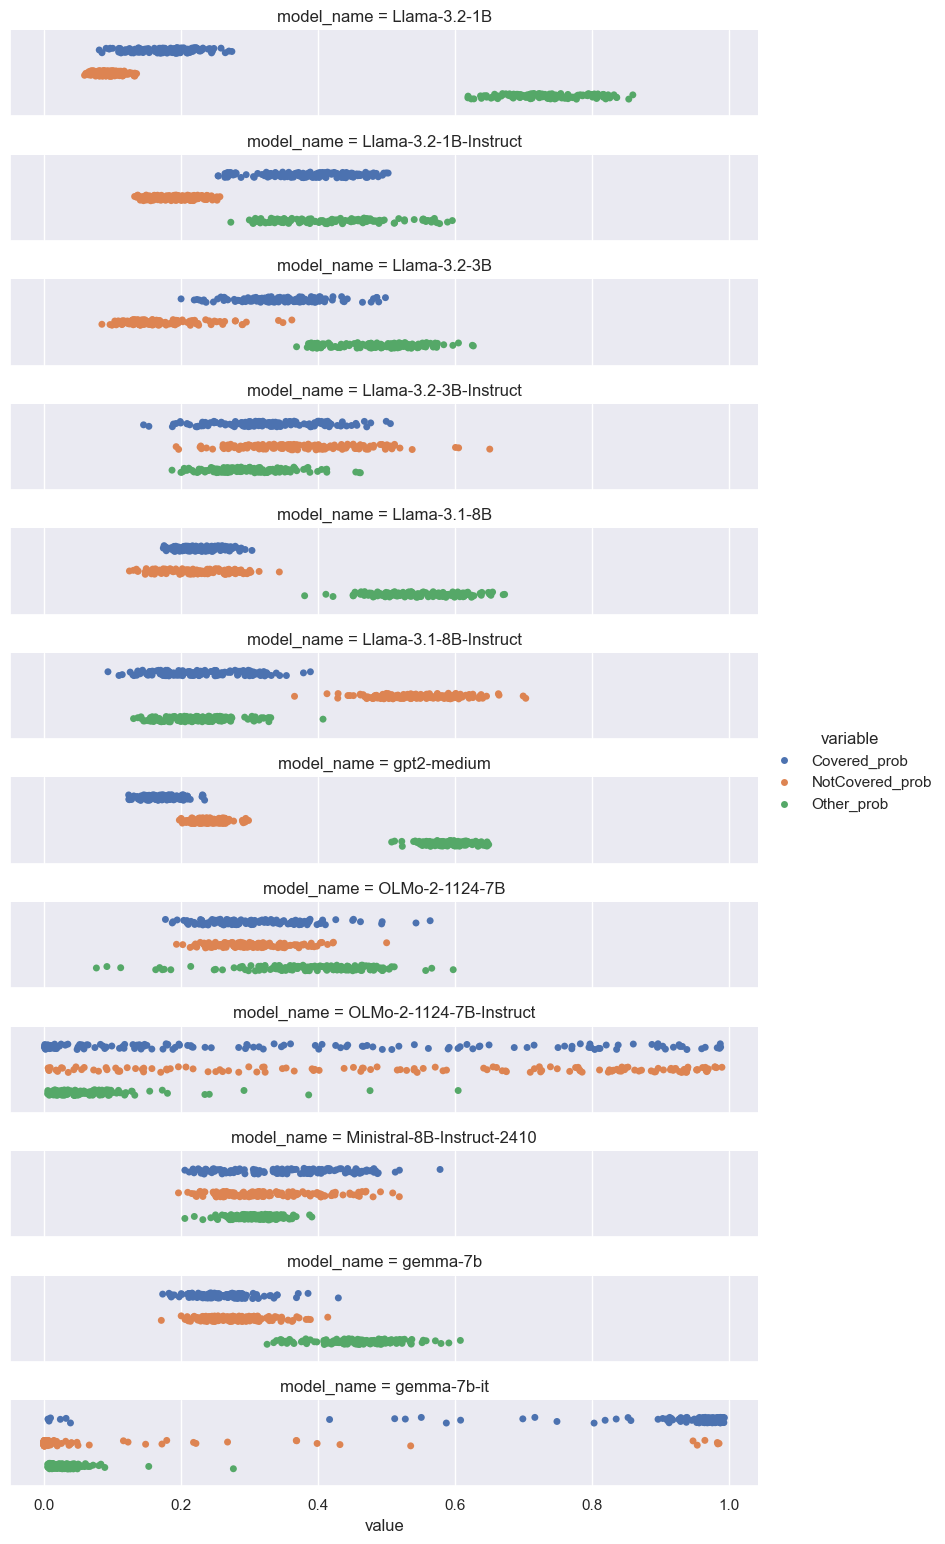

In [134]:
# Melt yes_or_no for the three supported variables
# fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
# plt.xticks(rotation=30)
sns.set_theme(style="darkgrid", rc={'axes.grid': True})
count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels
p = sns.catplot(x='value',  hue='variable', row="model_name", jitter=True, dodge=True,
                height=1.3, aspect=6,
                data=yes_or_no_df.melt(id_vars = ["model_name"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]), sharey=True)
# p.grid(b=True, which='both', color='gray', linewidth=0.1)
# for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
#     covered = counts[0]
#     not_covered = counts[1]
#     ax.text(ax.get_xlim()[1] + 0.05, i, f'{covered}:{not_covered}', 
#         ha='center', va='bottom', fontweight='bold')

fig.savefig("reports/chart-1-prob-ranges.pdf")

# Try boxplot for ranges discussion

In [ ]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels